# This notebook will create a Zarr for prevalence data 
## Based on data captured from https://aidsinfo.unaids.org/

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import xarray as xr
#import load_covid_data

sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [3]:
DATA_PATH = "/Users/nadeem/Downloads/COVID_HIV/"

In [4]:
#DF0 = pd.read_csv("/Users/nadeem/Downloads/COVID_HIV/People living with HIV_HIV Prevalence_Population_ Female adults (15-49).csv")
#DF1 = pd.read_csv("/Users/nadeem/Downloads/COVID_HIV/People living with HIV_HIV Prevalence_Population_ Male adults (15-49).csv")
#DF2 = pd.read_csv("/Users/nadeem/Downloads/COVID_HIV/People living with HIV_HIV Prevalence_Population_ Adults (15-49).csv")
#DF3 = pd.read_csv("/Users/nadeem/Downloads/COVID_HIV/People living with HIV_HIV Prevalence_Population_ Young women (15-24).csv")
#DF4 = pd.read_csv("/Users/nadeem/Downloads/COVID_HIV/People living with HIV_HIV Prevalence_Population_ Young men (15-24).csv")

In [5]:
DF0 = pd.read_excel(DATA_PATH+"People living with HIV_HIV Prevalence_Population_ Female adults (15-49).xls")
DF1 = pd.read_excel(DATA_PATH+"People living with HIV_HIV Prevalence_Population_ Male adults (15-49).xls")
DF2 = pd.read_excel(DATA_PATH+"People living with HIV_HIV Prevalence_Population_ Adults (15-49).xls")
DF3 = pd.read_excel(DATA_PATH+"People living with HIV_HIV Prevalence_Population_ Young women (15-24).xls")
DF4 = pd.read_excel(DATA_PATH+"People living with HIV_HIV Prevalence_Population_ Young men (15-24).xlsx")


In [6]:
DF0 = DF0.T 
DF0.columns = DF0.iloc[0]
DF0.drop(DF0.index[0],inplace=True)
DF1 = DF1.T 
DF1.columns = DF1.iloc[0]
DF1.drop(DF1.index[0],inplace=True)
DF2 = DF2.T 
DF2.columns = DF2.iloc[0]
DF2.drop(DF2.index[0],inplace=True)

DF3 = DF3.T 
DF3.columns = DF3.iloc[0]
DF3.drop(DF3.index[0],inplace=True)

DF4 = DF4.T 
DF4.columns = DF4.iloc[0]
DF4.drop(DF4.index[0],inplace=True)

In [7]:
DF0.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global
1990,<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],0.3 [0.2 - 0.4],0.1 [0.1 - 0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],... [... - ...],...,4.0 [3.5 - 4.6],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],9.8 [8.6 - 11.0],15.9 [13.5 - 18.1],0.2 [0.2 - 0.3]
1991,<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],0.3 [0.2 - 0.5],0.1 [0.1 - 0.2],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],... [... - ...],...,4.8 [4.2 - 5.4],... [... - ...],<0.1 [<0.1 - 0.1],<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],11.7 [10.3 - 13.2],19.7 [16.7 - 22.4],0.3 [0.2 - 0.3]
1992,<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],0.4 [0.3 - 0.6],0.2 [0.1 - 0.2],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],... [... - ...],...,5.5 [4.9 - 6.1],... [... - ...],<0.1 [<0.1 - 0.1],<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],13.5 [11.9 - 15.2],22.9 [19.5 - 26.1],0.3 [0.3 - 0.4]
1993,<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],0.5 [0.4 - 0.7],0.2 [0.2 - 0.2],0.1 [0.1 - 0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],... [... - ...],...,6.1 [5.5 - 6.8],... [... - ...],<0.1 [<0.1 - 0.1],<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],15.0 [13.2 - 16.9],25.6 [21.7 - 29.1],0.4 [0.3 - 0.5]
1994,<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],0.6 [0.4 - 0.8],0.2 [0.2 - 0.2],0.1 [0.1 - 0.1],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],... [... - ...],... [... - ...],...,6.6 [6.0 - 7.2],... [... - ...],<0.1 [<0.1 - 0.1],<0.1 [<0.1 - <0.1],... [... - ...],<0.1 [<0.1 - <0.1],<0.1 [<0.1 - <0.1],16.3 [14.3 - 18.3],27.4 [23.3 - 31.2],0.4 [0.4 - 0.5]


In [8]:
tmp0 = xr.Dataset({'Female15_49':(('time', 'country'), DF0.values),
                  'Male15_49':(('time', 'country'), DF1.values),
                  'All15_49':(('time', 'country'), DF2.values),
                  'Female15_24':(('time', 'country'), DF3.values),
                  'Male15_24':(('time', 'country'), DF4.values)},
                 coords={'year':DF0.index,
                        'country':DF0.columns.values})

In [9]:
tmp0

<xarray.Dataset>
Dimensions:      (country: 178, time: 29, year: 29)
Coordinates:
  * year         (year) object '1990' '1991' '1992' ... '2016' '2017' '2018'
  * country      (country) object 'Afghanistan' 'Albania' ... 'Global'
Dimensions without coordinates: time
Data variables:
    Female15_49  (time, country) object '<0.1 [<0.1 - <0.1]' ... '0.8 [0.7 - 1.0]'
    Male15_49    (time, country) object '<0.1 [<0.1 - <0.1]' ... '0.7 [0.5 - 0.8]'
    All15_49     (time, country) object '<0.1 [<0.1 - <0.1]' ... '0.8 [0.6 - 0.9]'
    Female15_24  (time, country) object '<0.1 [<0.1 - <0.1]' ... '0.4 [0.2 - 0.6]'
    Male15_24    (time, country) object '<0.1 [<0.1 - <0.1]' ... '0.2 [0.1 - 0.3]'

In [30]:
tmp0.attrs['units'] = 'percent'

In [31]:
tmp0.to_zarr(DATA_PATH+'HIV_prevalence_SA.zarr','w')

In [32]:
tmp0.sel(country='Global')['All15_49']

<xarray.DataArray 'All15_49' (time: 29)>
array(['0.3 [0.2 - 0.3]', '0.3 [0.3 - 0.4]', '0.4 [0.3 - 0.4]',
       '0.4 [0.3 - 0.5]', '0.5 [0.4 - 0.5]', '0.5 [0.4 - 0.6]',
       '0.5 [0.5 - 0.6]', '0.6 [0.5 - 0.7]', '0.6 [0.5 - 0.7]',
       '0.6 [0.5 - 0.8]', '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]',
       '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]',
       '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]',
       '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.8]',
       '0.7 [0.6 - 0.8]', '0.7 [0.6 - 0.9]', '0.7 [0.6 - 0.9]',
       '0.7 [0.6 - 0.9]', '0.7 [0.6 - 0.9]', '0.7 [0.6 - 0.9]',
       '0.8 [0.6 - 0.9]', '0.8 [0.6 - 0.9]'], dtype=object)
Coordinates:
    country  <U6 'Global'
Dimensions without coordinates: time

In [33]:
Estimate = []
for i in tmp0.sel(country='Global')['All15_49'].values:
    Estimate.append(float(i.split(' [')[0]))

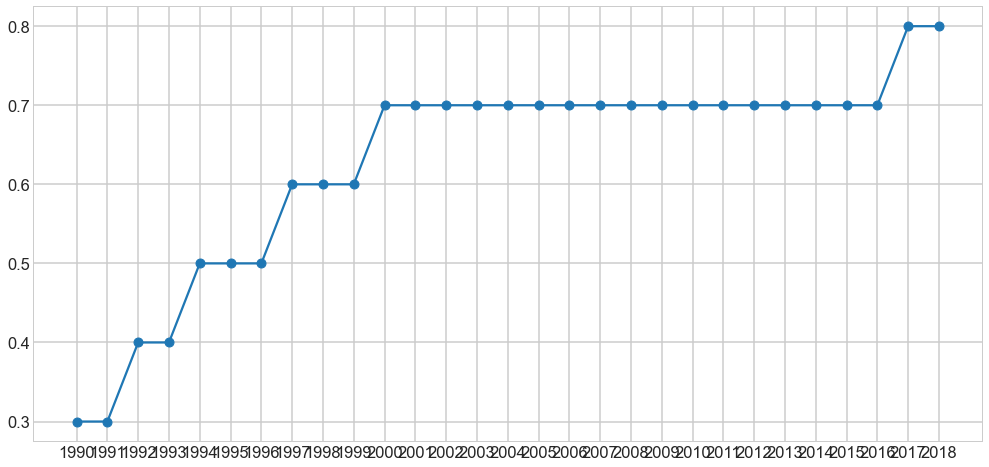

In [34]:
plt.figure(figsize=(17,8))
plt.plot(tmp0['year'],Estimate,'o-')